In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


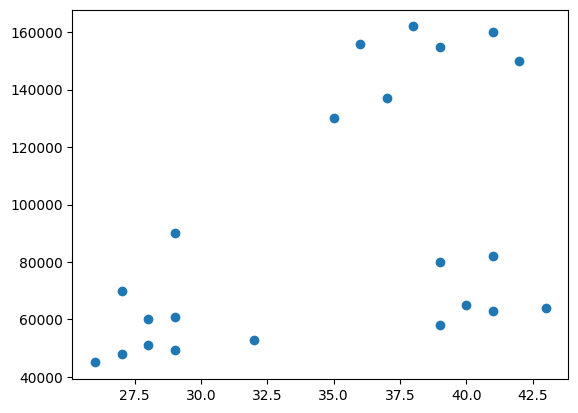

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [4]:
df.drop(['Name'], axis = 'columns', inplace= True)
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [5]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])
df

,Age,Income($)
0,27,0.213675
1,29,0.384615
2,29,0.136752
3,28,0.128205
4,42,0.897436
5,39,0.940171
6,41,0.982906
7,38,1.000000
8,36,0.948718
9,35,0.726496


In [6]:
scalar = MinMaxScaler()
scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])
df

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


In [7]:
km = KMeans(n_clusters=3)
y_predicted= km.fit_predict(df)



c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
df['Cluster']= y_predicted
df

,Age,Income($),Cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [9]:
df0 = df[df.Cluster==0]
df1 = df[df.Cluster==1]
df2 = df[df.Cluster==2]

Text(0, 0.5, 'Income($)')

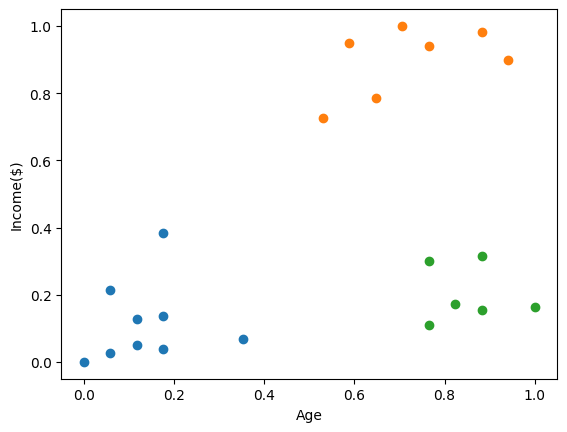

In [12]:
plt.scatter(df0['Age'], df0['Income($)'])
plt.scatter(df1['Age'], df1['Income($)'])
plt.scatter(df2['Age'], df2['Income($)'])

plt.xlabel('Age')
plt.ylabel('Income($)')

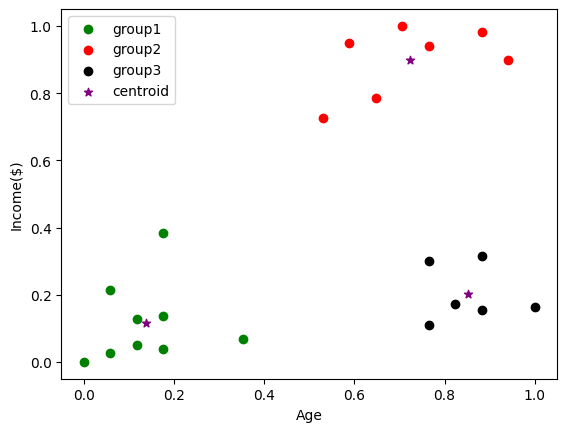

In [19]:
##plotting the centroid
km.cluster_centers_

plt.scatter(df0['Age'], df0['Income($)'], color = 'green', label = 'group1')
plt.scatter(df1['Age'], df1['Income($)'], color = 'red', label ='group2')
plt.scatter(df2['Age'], df2['Income($)'], color = 'black', label = 'group3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker ='*', label ='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

Elbow Plot

In [23]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

sse

c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\U

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21578607765873023,
 0.18427868455224797,
 0.13265419827245162,
 0.10383752586603562]

In [29]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Income($)', 'Age']])
    sse.append(km.inertia_)

sse

c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\subra\.conda\envs\TensorFlow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\U

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3625079900797329,
 0.2664030124668416,
 0.21055478995472496,
 0.18173811754830896,
 0.13781880133764024,
 0.10383752586603562]

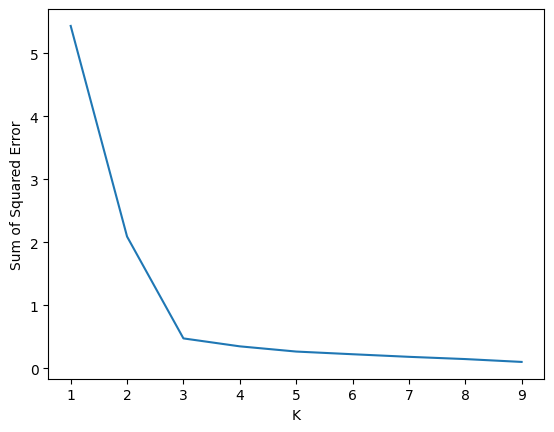

In [28]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

In [ ]:
##Exercise